# Letter Support vector machine classifier module no 24

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("letterdata.csv")

In [3]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.corr()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


In [5]:
df.shape

(20000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
df.isnull().sum() # there is no na value 

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
round(df.describe(),2) # description of data and its spread

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,4.02,7.04,5.12,5.37,3.51,6.90,7.50,4.63,5.18,8.28,6.45,7.93,3.05,8.34,3.69,7.80
std,1.91,3.30,2.01,2.26,2.19,2.03,2.33,2.70,2.38,2.49,2.63,2.08,2.33,1.55,2.57,1.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,5.00,4.00,4.00,2.00,6.00,6.00,3.00,4.00,7.00,5.00,7.00,1.00,8.00,2.00,7.00
50%,4.00,7.00,5.00,6.00,3.00,7.00,7.00,4.00,5.00,8.00,6.00,8.00,3.00,8.00,3.00,8.00
75%,5.00,9.00,6.00,7.00,5.00,8.00,9.00,6.00,7.00,10.00,8.00,9.00,4.00,9.00,5.00,9.00
max,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00


In [9]:
df['letter'].value_counts() # value count of letters

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

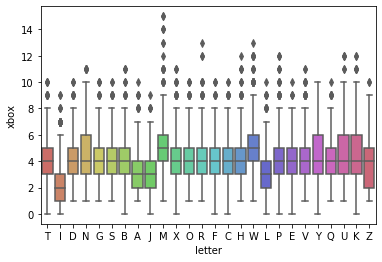

In [10]:
sns.boxplot(x="letter",y="xbox",data=df,palette = "hls")

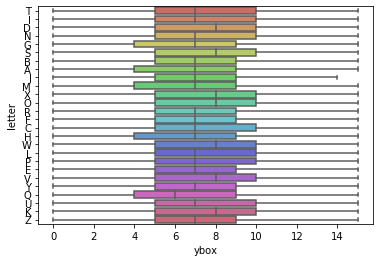

In [11]:
sns.boxplot(x="ybox",y="letter",data=df,palette = "hls")

### Featurs Scalling  of our data 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('letter',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(df.drop('letter',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


## Train test split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
X = scaled_features
y = df['letter']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# SVM Classifiers 

In [20]:
#import SVC classifier
from sklearn.svm import SVC
#import metrics to compute accuracy
from sklearn.metrics import accuracy_score

In [21]:
#initiacte classifier
svc = SVC()

In [22]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction and Evaluation 

In [23]:
predictions = svc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,predictions))

[[260   0   2   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1 242   0   4   1   2   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0   0   0]
 [  0   0 190   0   5   0   5   1   0   0   1   0   1   0   7   0   0   1
    0   0   1   0   1   0   0   0]
 [  0   2   0 274   0   0   0   3   0   0   0   0   0   1   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 242   0   7   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   0   0   0   3]
 [  0   1   0   0   1 225   0   0   1   0   0   0   0   0   0   0   0   0
    0   4   0   0   0   0   0   0]
 [  0   0   1   4   0   0 234   0   0   0   0   1   0   0   0   0   1   2
    0   0   0   2   0   0   0   0]
 [  0   6   0  11   0   0   4 182   0   0   5   0   0   1   5   1   4  15
    0   0   1   0   0   1   2   0]
 [  0   0   0   0   0   3   0   0 223  10   0   0   0   0   0   0   0   0
    0   0   0   0   0   3   0   0]
 [  1   0   0   1  

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       0.98      0.98      0.98       264
           B       0.88      0.96      0.91       253
           C       0.95      0.89      0.92       213
           D       0.89      0.97      0.93       282
           E       0.92      0.94      0.93       257
           F       0.90      0.97      0.94       232
           G       0.89      0.96      0.92       245
           H       0.94      0.76      0.84       238
           I       0.97      0.93      0.95       239
           J       0.95      0.94      0.94       245
           K       0.92      0.90      0.91       203
           L       0.99      0.94      0.96       248
           M       0.95      0.98      0.97       274
           N       0.97      0.92      0.95       254
           O       0.88      0.93      0.91       248
           P       1.00      0.89      0.94       277
           Q       0.95      0.95      0.95       279
           R       0.82    

In [27]:
print('Model Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test,predictions))) # Accuracy predictions 

Model Accuracy Score: 0.9417


## Create Classification SVM classification linear  object

SVM classifiction linear Kernel object 

In [28]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth

In [29]:
model_linear = SVC(kernel = "linear")

In [30]:
model_linear.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction and Evaluation

In [31]:
pred_test_linear = model_linear.predict(X_test)

In [32]:
np.mean(pred_test_linear==y_test) 

0.8534848484848485

# Kernel poly 

In [33]:
model_poly = SVC(kernel = "poly")

In [34]:
model_poly.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction and evaluation

In [35]:
pred_test_poly = model_poly.predict(X_test)

In [36]:
np.mean(pred_test_poly==y_test) 

0.8825757575757576

# Kernel RBF 

In [43]:
model_rbf = SVC(kernel = "rbf")

In [44]:
model_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicition and Evaluation

In [39]:
pred_test_rbf = model_rbf.predict(X_test)

In [40]:
np.mean(pred_test_rbf==y_test) 

0.9416666666666667

# Kernel Sigmoid

In [45]:
model_sig = SVC(kernel="sigmoid")

In [46]:
model_sig.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicition and Evaluation

In [47]:
pred_test_sig = model_sig.predict(X_test)

In [48]:
np.mean(pred_test_sig==y_test)

0.46924242424242424